In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Import libraries

# Librerias comunes
import pandas as pd
import numpy as np
import os, math, random
from datetime import datetime as dt
import datetime

# Librerias keras y tensorflow

from tensorflow import keras
import tensorflow as tf
from keras.layers import Dense,GlobalAveragePooling2D,BatchNormalization,Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras import preprocessing
from keras.models import Model
from tensorflow.keras.optimizers import Adam
from keras.models import load_model

from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

# Librerias de Inception V3
from keras.applications.inception_v3 import preprocess_input
from keras.applications import inception_v3

# Librerias para visualizar las imágenes
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image

# Librerias de sklearn
#from sklearn.metrics import confusion_matrix
#%load_ext tensorboard

seed = 1234

In [ ]:
train_dir = '/content/gdrive/MyDrive/tfm/data-augmentation/'

In [ ]:
sub_class = os.listdir(train_dir)
n_classes = len(sub_class)

In [ ]:
im_width = 299
im_height = 299
channels=3

In [ ]:
batch_size = 1

In [ ]:
# Función para visualizar una imagen

def get_subplot_grid(mylist, columns, figwidth, figheight):
    plot_rows = math.ceil(len(mylist) / columns)
    fig, ax = plt.subplots(plot_rows, columns, sharey=True, sharex=False)
    fig.set_figwidth(figwidth)
    fig.set_figheight(figheight)
    fig.subplots_adjust(hspace=0.1)
    axflat = ax.flat
    #remove the unused subplot, if any
    for ax in axflat[ax.size - 1:len(mylist) - 1:-1]:
        ax.set_visible(False)

    return fig, axflat

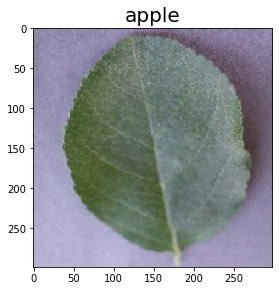

CPU times: user 340 ms, sys: 9.74 ms, total: 350 ms
Wall time: 366 ms


In [ ]:
# Visualizo una imagen al azar por cada una de las clases del conjunto de imaganes de Train
%%time

test_images_classes = sub_class
test_images=[]

fig, axflat = get_subplot_grid(mylist=test_images_classes, columns=6, figwidth=30, figheight=30)

for idx, label in enumerate(test_images_classes):
    image_folder = os.path.join(train_dir, label)
    image_file = os.path.join(image_folder, random.choice(os.listdir(image_folder)) )
    loaded_image = keras.preprocessing.image.load_img(path=image_file,target_size=(im_width,im_height,channels))
    
    #convert to array and resample dividing by 255
    img_array = keras.preprocessing.image.img_to_array(loaded_image) / 255.
    test_images.append({"idx":idx, "image":img_array, "label": label})
    
    axflat[idx].set_title(label, size=20)
    axflat[idx].imshow(img_array)
plt.show()

In [ ]:
# Estandarizar valores para estar en el [0, 1] rango utilizando una capa reescalamiento
train_datagen =  ImageDataGenerator(
    rescale=1/255.0, # con preprocess_input no es necesario hacer el rescalerescale=1/255.0,
    rotation_range=70
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=40
    #zoom_range=0.4
    #vertical_flip=True
    #brightness_range=[0.5, 1.5]
)

# loads the image dataset in memory and generates batches of augmented data
train_generator = train_datagen.flow_from_directory(
  directory=train_dir,
  target_size=(im_width, im_height),
  batch_size=batch_size,
  color_mode='rgb',
  class_mode='categorical'
  #shuffle=True
  #subset='training',
  #seed=SEED
)

Found 1 images belonging to 1 classes.


Batch shape (input):  (1, 299, 299, 3)
Batch shape (target): (1, 1)


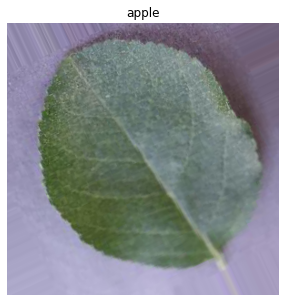

CPU times: user 160 ms, sys: 3.05 ms, total: 163 ms
Wall time: 168 ms


In [ ]:
# Pintar alguno de los datos que estoy tratando aplicando Data Augmentation
%%time 

classes = [k for k, v in train_generator.class_indices.items()]

n_rows = 1
n_cols = 1

for batch_x, batch_y in train_generator:
    print("Batch shape (input): ", batch_x.shape)
    print("Batch shape (target):", batch_y.shape)

    plt.figure(figsize=(5, 5))
    for c, x, y in zip(range(len(batch_x)), batch_x, batch_y):
        if c == n_rows * n_cols:
            break

        plt.subplot(n_rows, n_cols, c + 1)
        plt.imshow(x)
        plt.axis("off")
        plt.title(classes[np.where(y)[0][0]])

    plt.show()
    break